In [21]:
#UPDATE this cell with your data source + Dictionary/Codebook
#data source: https://www2.ed.gov/about/inits/ed/edfacts/data-files/index.html
#data dictionary: FIND LATER

In [22]:
#import libraries
import pandas as pd
import matplotlib

In [23]:
#name file path path and choose the appropriate cell to execute
file = 'ffpub21.csv' 

In [24]:
#import numpy
import numpy as np

In [25]:
#read data from CSV and print head
df = pd.read_csv('ffpub21.csv')
print(df.head())
#df = pd.DataFrame(np.random.randint(0,100, size = (1000, 12)), columns = list('ABCDEFGHIJKL'))
#print(df)

   FPOVCUT  FPERSONS  FHEADIDX  FSPOUIDX  FOWNU6  FRELU6  FKIND  FKINDEX  \
0    20244         3         1         2       0       0      1        1   
1    20244         3         1         2       0       0      1        1   
2    12413         1         1         0       0       0      2        3   
3    17839         2         1         0       0       0      2        3   
4    13465         1         3         0       0       0      3        4   

   FTYPE  FRELU18  ...  F_MV_SL  I_FHIPVAL  I_FHIPVAL2  I_FMEDVAL  I_FMOOP  \
0      1        0  ...        0          1           1          0        1   
1      1        0  ...        0          0           0          0        0   
2      2        0  ...        0          1           1          0        1   
3      1        1  ...      105          0           0          0        0   
4      5        0  ...        0          0           0          0        0   

   I_FMOOP2  I_FOTCVAL  POVLL  FILEDATE  YYYYMM  
0         1          0  

In [26]:
#print first five rows of dataset
print(df.head())

   FPOVCUT  FPERSONS  FHEADIDX  FSPOUIDX  FOWNU6  FRELU6  FKIND  FKINDEX  \
0    20244         3         1         2       0       0      1        1   
1    20244         3         1         2       0       0      1        1   
2    12413         1         1         0       0       0      2        3   
3    17839         2         1         0       0       0      2        3   
4    13465         1         3         0       0       0      3        4   

   FTYPE  FRELU18  ...  F_MV_SL  I_FHIPVAL  I_FHIPVAL2  I_FMEDVAL  I_FMOOP  \
0      1        0  ...        0          1           1          0        1   
1      1        0  ...        0          0           0          0        0   
2      2        0  ...        0          1           1          0        1   
3      1        1  ...      105          0           0          0        0   
4      5        0  ...        0          0           0          0        0   

   I_FMOOP2  I_FOTCVAL  POVLL  FILEDATE  YYYYMM  
0         1          0  

In [27]:
#print list of column names 
print(list(df))
print(len(df))
print(len(list(df)))

['FPOVCUT', 'FPERSONS', 'FHEADIDX', 'FSPOUIDX', 'FOWNU6', 'FRELU6', 'FKIND', 'FKINDEX', 'FTYPE', 'FRELU18', 'FOWNU18', 'FLASTIDX', 'FMLASIDX', 'FH_SEQ', 'FAMLIS', 'FANNVAL', 'FCSPVAL', 'FDISVAL', 'FDIVVAL', 'FDSTVAL', 'FEARNVAL', 'FEDVAL', 'FFINVAL', 'FFPOS', 'FFRVAL', 'FHIP_VAL', 'FHIP_VAL2', 'FINC_ANN', 'FINC_CSP', 'FINC_DIS', 'FINC_DIV', 'FINC_DST', 'FINC_ED', 'FINC_FIN', 'FINC_FR', 'FINC_INT', 'FINC_OI', 'FINC_PAW', 'FINC_PEN', 'FINC_RNT', 'FINC_SE', 'FINC_SS', 'FINC_SSI', 'FINC_SUR', 'FINC_UC', 'FINC_VET', 'FINC_WC', 'FINC_WS', 'FINTVAL', 'FMED_VAL', 'FMOOP', 'FMOOP2', 'FOIVAL', 'FOTC_VAL', 'FOTHVAL', 'FPAWVAL', 'FPCTCUT', 'FPENVAL', 'FRECORD', 'FRNTVAL', 'FRSPOV', 'FRSPPCT', 'FSEVAL', 'FSPANISH', 'FSSIVAL', 'FSSVAL', 'FSUP_WGT', 'FSURVAL', 'FTOTVAL', 'FTOT_R', 'FUCVAL', 'FVETVAL', 'FWCVAL', 'FWSVAL', 'F_MV_FS', 'F_MV_SL', 'I_FHIPVAL', 'I_FHIPVAL2', 'I_FMEDVAL', 'I_FMOOP', 'I_FMOOP2', 'I_FOTCVAL', 'POVLL', 'FILEDATE', 'YYYYMM']
73151
85


In [42]:
#output frequency table of chosen column in dataset
col = 'FKIND' #<-edit this value! column name as it appears in dataframe
col_name = 'kind of family' #<-edit this value! descriptive name for column
freq = df[col].value_counts().rename_axis(col_name).reset_index(name='freq')
freq = freq.sort_values(by = col_name)
print(freq)

   kind of family   freq
0               1  32306
2               2  17439
1               3  23406


In [43]:
#replace codes with descriptive labels
#if your dataframe already has descriptive labels, you don't need to run this cell
codebook = [['1', 'Married Couple Family'], #<- if appropriate, replace these values based on codebook or data dictionary for your dataset
            ['2', 'Male Reference Person'], 
            ['3', 'Female Reference Person']]
#loops through label codes and replaces them in frequency table
for lbl in codebook:
    #Use line below if codes are stored as integers
    freq[col_name] = freq[col_name].replace(int(lbl[0]), lbl[1])
    #use line below if codes are stored as inegers
    #freq[col_name] = freq[col_name].replace(lbl[0], lbl[1])


#prints updated frequency table
print(freq)

            kind of family   freq
0    Married Couple Family  32306
2    Male Reference Person  17439
1  Female Reference Person  23406


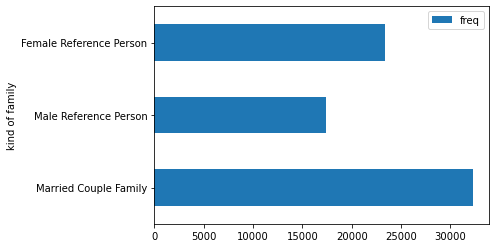

In [44]:
#create frequency chart
ax = freq.plot.barh(x=col_name, y='freq', rot=0)

In [45]:
#calculate mean of a column
quant_col = 'FPERSONS'
mean = df[quant_col].mean()
print(mean)

median = df[quant_col].median()
print(median)

standard_deviation = df[quant_col].std()
print(standard_deviation)

2.3182594906426433
2.0
1.4604262563667194
